In [1]:
import pandas as pd

data = pd.read_csv("31. HR_comma_sep.csv")
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
#Preprocess seperti yang lama

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

enc_ode = OrdinalEncoder(categories=[['low','medium','high']], unknown_value=99, handle_unknown='use_encoded_value')
enc_ohe = OneHotEncoder(categories=[['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD']] ,handle_unknown='ignore', sparse = False)

#Label encoder untuk data ordinal
y = np.array(data['salary']).reshape(-1,1)
enc_ode.fit(y)
data['salary'] = enc_ode.transform(y)

y = np.array(data['sales']).reshape(-1,1)
enc_ohe.fit(y)

y1 =  enc_ohe.transform(y)

data[['sales_sls', #sales 
      'sales_act', #acounting 
      'sales_hr', #HR
      'sales_tec', #technical 
      'sales_sup', #suppport 
      'sales_mng', #management
      'sales_it', #IT
      'sales_pro',#product
     'sales_mrk',#marketing
      'sales_rnd']] = y1
data.head()

data_fin = data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'sales_sls', 'sales_act',
       'sales_hr', 'sales_tec', 'sales_sup', 'sales_mng', 'sales_it',
       'sales_pro', 'sales_mrk', 'sales_rnd']].copy()
data_fin.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_sls,sales_act,sales_hr,sales_tec,sales_sup,sales_mng,sales_it,sales_pro,sales_mrk,sales_rnd
0,0.38,0.53,2,157,3,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#pisahkan x dan y
data_x = data_fin[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'sales_sls', 'sales_act',
       'sales_hr', 'sales_tec', 'sales_sup', 'sales_mng', 'sales_it',
       'sales_pro', 'sales_mrk', 'sales_rnd']].copy()
data_y = data_fin['left']
data_y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [7]:
#Coba masukkan langsung tanpa SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25, random_state=0)

#logistic
LR = LogisticRegression(max_iter=2000)
LR.fit(x_train,y_train)

#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

#Random Forest
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [24]:
#Evaluasi untuk train-test split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#evaluasi LR
prediction1 = LR.predict(x_test)
print(confusion_matrix(y_test, prediction1))
print("Akurasi dari Logistic Regression adalah: %.2f" % (accuracy_score(y_test, prediction1)*100) )
print("Akurasi dari Logistic Regression adalah:",recall_score(y_test, prediction1))
print("Akurasi dari Logistic Regression adalah:",precision_score(y_test, prediction1))
print("")

#evaluasi KNN
prediction2 = knn.predict(x_test)
print(confusion_matrix(y_test, prediction2))
print("Akurasi dari KNN adalah: %.2f" % (accuracy_score(y_test, prediction2)*100) )
print("Akurasi dari KNN adalah:",recall_score(y_test, prediction2))
print("Akurasi dari KNN adalah:",precision_score(y_test, prediction2))
print("")

#ealuasi RF
prediction3 = rf.predict(x_test)
print(confusion_matrix(y_test, prediction3))
print("Akurasi dari Random Forest adalah: %.2f" % (accuracy_score(y_test, prediction3)*100) )
print("Akurasi dari Random Forest adalah:",recall_score(y_test, prediction3))
print("Akurasi dari Random Forest adalah:",precision_score(y_test, prediction3))


[[2658  223]
 [ 561  308]]
Akurasi dari Logistic Regression adalah: 79.09
Akurasi dari Logistic Regression adalah: 0.35443037974683544
Akurasi dari Logistic Regression adalah: 0.5800376647834274

[[2728  153]
 [  73  796]]
Akurasi dari KNN adalah: 93.97
Akurasi dari KNN adalah: 0.9159953970080552
Akurasi dari KNN adalah: 0.8387776606954689

[[2856   25]
 [ 379  490]]
Akurasi dari Random Forest adalah: 89.23
Akurasi dari Random Forest adalah: 0.5638665132336018
Akurasi dari Random Forest adalah: 0.9514563106796117


In [26]:
#dari hasil di atas, terlihat KNN memiliki performa yang lebih baik di antara yang lain
#Sekarang kita akan melakkan contoh cross validation untuk KNN agar melihat apakah model overfit atau underfit, 
#ataukah sudah sangat baik

#Gambaran proses K-fold K = 5

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

#misal kita ada 25 data, maka inilah proses yang akan terjadi

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [27]:
#sekarang kita aplikasikan ke model

from sklearn.model_selection import cross_val_score


# 10-fold terhadap SEMUA DATA ya, bukan data Train saja

scores = cross_val_score(knn, data_x, data_y, cv=10, scoring='accuracy')
print(scores)

# use average accuracy as an estimate of out-of-sample accuracy
print("rata-rata akurasi hasil 10-fold:",scores.mean())


[0.93466667 0.93       0.93266667 0.92266667 0.926      0.92666667
 0.952      0.936      0.95333333 0.95063376]
rata-rata akurasi hasil 10-fold: 0.9364633755837225


In [28]:
#Hyperparameter Tunning
#More efficient parameter tuning using GridSearchCV
#Allows you to define a grid of parameters that will be searched using K-fold cross-validation
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
k_range = list([3, 5, 7, 9, 11])
#dictionary key must be same as selected ML method in scikit learn parameter
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [3, 5, 7, 9, 11]}


In [30]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

#do it for ALL DATA
# fit the grid with data
grid.fit(data_x, data_y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='accuracy')

In [31]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.946065,0.017942,{'n_neighbors': 3}
1,0.936463,0.010873,{'n_neighbors': 5}
2,0.941396,0.007068,{'n_neighbors': 7}
3,0.939730,0.007668,{'n_neighbors': 9}
4,0.937930,0.007085,{'n_neighbors': 11}


In [33]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

[0.94606458 0.93646338 0.94139649 0.93972995 0.93792978]
0.946064576384256
{'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)


Text(0, 0.5, 'Cross-Validated Accuracy')

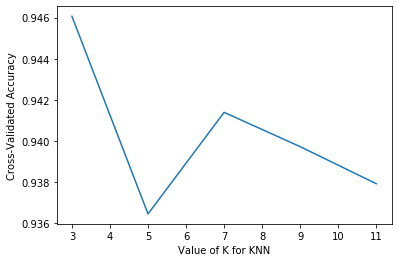

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [38]:
#How to "SEARCH" more than 1 parameter combination?
#we will try thin on randomforest

# define the parameter values that should be searched
n_tree = list([5,7,9])
crit = list (["gini", "entropy"])
max_d = list([3,4,5])


In [39]:
param_grid = dict(n_estimators=n_tree, criterion=crit, max_depth = max_d)
print(param_grid)

{'n_estimators': [5, 7, 9], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5]}


In [40]:
# instantiate the grid
grid = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', return_train_score=False)

# fit the grid with data
grid.fit(data_x, data_y)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=2, random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5], 'n_estimators': [5, 7, 9]},
             scoring='accuracy')

In [41]:
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.880392,0.006178,"{'criterion': 'gini', 'max_depth': 3, 'n_estim..."
1,0.888460,0.006140,"{'criterion': 'gini', 'max_depth': 3, 'n_estim..."
2,0.894794,0.011990,"{'criterion': 'gini', 'max_depth': 3, 'n_estim..."
3,0.917528,0.011834,"{'criterion': 'gini', 'max_depth': 4, 'n_estim..."
4,0.919128,0.006152,"{'criterion': 'gini', 'max_depth': 4, 'n_estim..."
5,0.917328,0.006590,"{'criterion': 'gini', 'max_depth': 4, 'n_estim..."
6,0.933997,0.016182,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
7,0.939864,0.016066,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
8,0.934063,0.016790,"{'criterion': 'gini', 'max_depth': 5, 'n_estim..."
9,0.886925,0.016547,"{'criterion': 'entropy', 'max_depth': 3, 'n_es..."


In [42]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.939863509006004
{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 7}
